###Lab 1 - Klasifikasi SVM dengan Data Dummy Linier

####Langkah 1 - Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

####Langkah 2 - Membuat Data Dummy

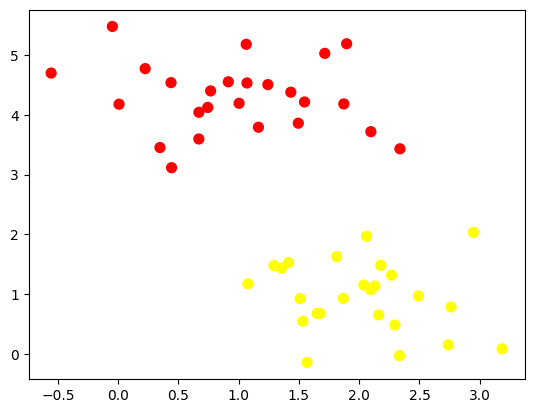

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

####Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

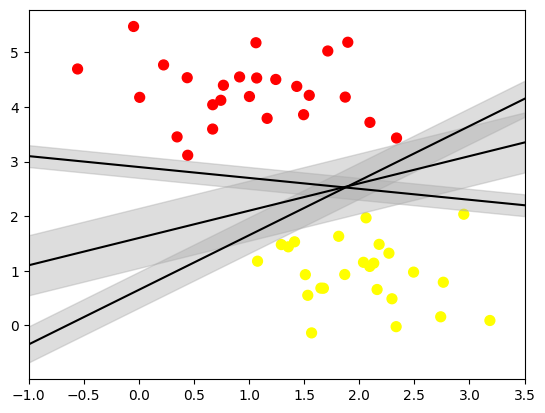

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m * xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

####Langkah 5 - Fitting Model

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

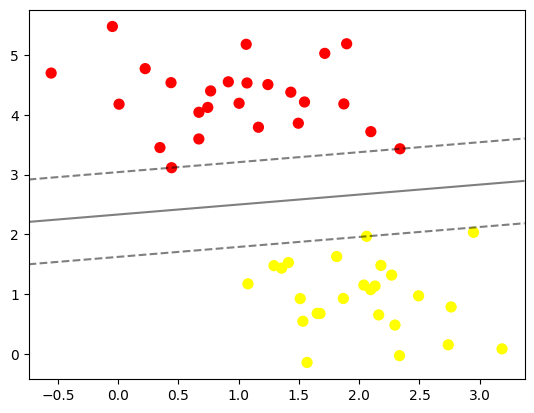

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

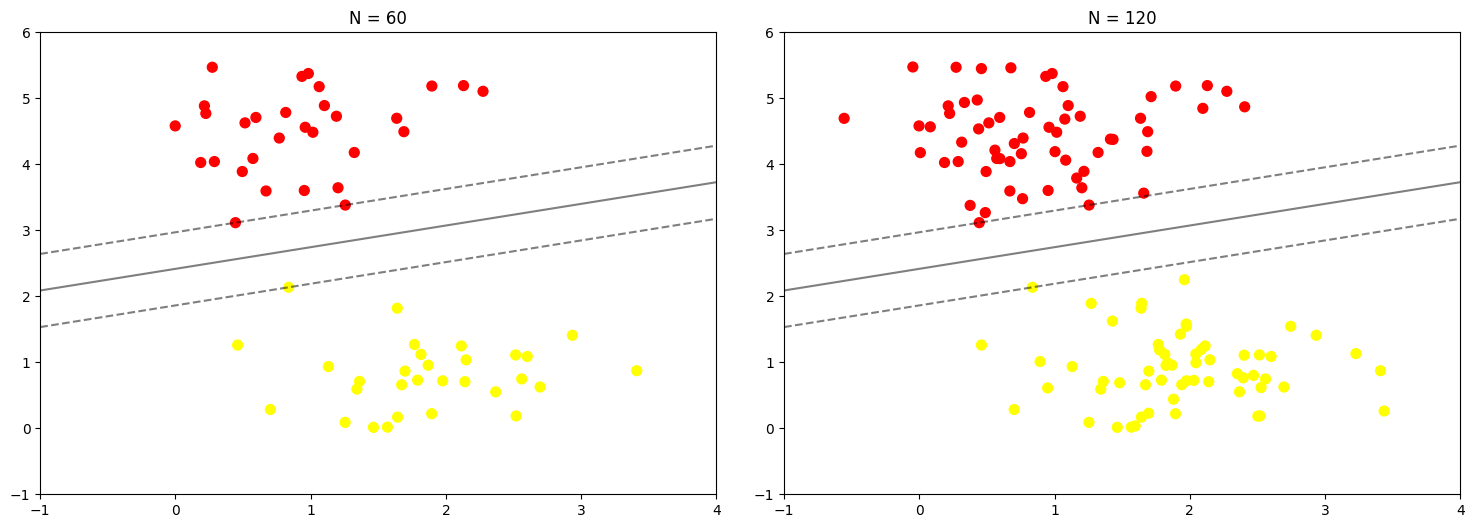

In [8]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
  axi.set_title('N = {0}'.format(N))

In [9]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

In [10]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00


###Lab 2 - Klasifikasi SVM dengan Data Dummy Non-Linier

####Langkah 1 - Ilustrasi Data Non-Linier

#####Langkah 1a - Import Library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

#####Langkah 1b - Buat Kembali Fungsi Plotting

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k',
             levels=[-1, 0, 1], alpha=0.5,
             linestyles=['--', '-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

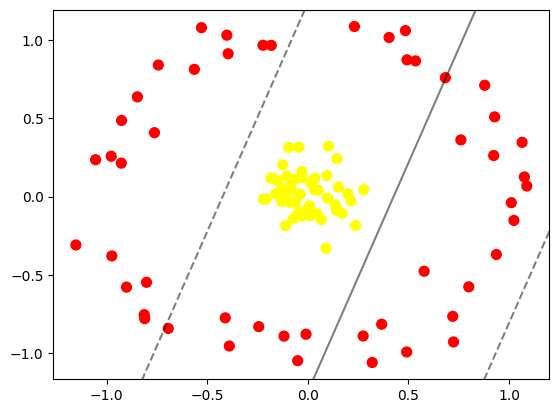

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [14]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev = 30, azim = 30, X=X, y=y):
  r = np.exp(-(X**2).sum(1))
  ax = plt.subplot(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
  ax.view_init(elev=elev, azim=azim)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.02401749, -0.15178575],
       [ 0.31972464, -1.05763349],
       [-0.40276125,  1.02916554],
       [-0.04349977, -0.12284265],
       [-0.09005706, -0.0377293 ],
       [ 0.8785875 ,  0.70985159],
       [-0.07068667, -0.13809098],
       [ 0.15093453,  0.06046161],
       [-0.13125605, -0.02943719],
       [-0.04500529, -0.09960658],
       [ 0.40344437,  1.01448659],
       [ 0.57783605, -0.47580719],
       [ 0.68312172,  0.75815205],
       [ 0.01368866,  0.0890455 ],
       [ 0.09008791, -0.32971993],
       [-0.56436599,  0.81155805],
       [ 0.53512127,  0.86521654],
       [ 0.23783952, -0.18401489],
       [ 0.06659082, -0.14647929],
       [ 0.79968277, -0.57538223],
       [ 0.49107182, -0.99069482],
       [-0.11870598, -0.88948901],
       [-0.22321129,  0.9649248 ],
       [-0.97763507,  0.25740517],
       [-0.18401394,  0.11687987],
       [-0.0378327 ,  0.01445282],
       [-0.04413023,  0.31496016],
       [-0.18182666,  0.96434732],
       [-0.12984068,  0.05284825],
       [-0.39648049,  0.91078457],
       [ 0.03301368,  0.04504439],
       [ 0.23135058,  1.08462119],
       [-0.03023384,  0.15958235],
       [ 1.01103661, -0.03886168],
       [ 0.21454114, -0.02785105],
       [ 0.00165746, -0.11587578],
       [-0.81349102, -0.75268216],
       [ 0.48479226,  1.05834579],
       [-0.92743437,  0.21330138],
       [ 0.14469915,  0.24165551],
       [-0.90135025, -0.57727933],
       [ 0.19788389,  0.01842641],
       [ 0.05178254,  0.03948941],
       [ 0.04513566, -0.10842002],
       [-0.17262002,  0.1169791 ],
       [-0.97431974, -0.37816652],
       [ 0.92358393,  0.26200405],
       [ 0.09489062,  0.13357839],
       [-0.0299805 , -0.12468356],
       [-0.08481588,  0.06478814],
       [ 0.16961096, -0.10698926],
       [-0.74339344,  0.83884989],
       [-0.1585011 ,  0.01804581],
       [-0.69404401, -0.8406027 ],
       [-0.22039763, -0.01726246],
       [ 0.1025437 ,  0.32156411],
       [-0.14966368,  0.10139483],
       [ 0.13729118, -0.05381001],
       [ 0.00776999, -0.05867036],
       [ 1.06454334,  0.34599565],
       [-0.20667573, -0.0155524 ],
       [-0.84741207,  0.63585035],
       [ 1.07599321,  0.12536136],
       [-0.11075613, -0.00875684],
       [-0.41090676, -0.7730505 ],
       [-0.52894234,  1.07695339],
       [-1.15308306, -0.30838909],
       [ 0.27789709,  0.04405518],
       [ 0.71998755, -0.76353756],
       [-0.08257142,  0.04179578],
       [ 0.09784022, -0.01047384],
       [-0.80207699, -0.54642175],
       [-0.03021612,  0.12159348],
       [ 0.00268086, -0.07401633],
       [-0.92611677,  0.48529808],
       [-0.09523744,  0.3134098 ],
       [ 0.72375408, -0.92674059],
       [ 0.01155505, -0.12174245],
       [-0.0019286 , -0.08626871],
       [ 0.0352676 ,  0.11758772],
       [-0.06701278,  0.11037243],
       [-0.06241095, -0.03548075],
       [-1.05518087,  0.2350221 ],
       [-0.76257531,  0.4074895 ],
       [-0.05071792, -1.04625582],
       [ 0.14130752, -0.08733956],
       [ 0.36662253, -0.81371336],
       [ 0.49250932,  0.87198486],
       [-0.11020326, -0.1851697 ],
       [ 0.93672369, -0.36925299],
       [ 0.92825603,  0.50824796],
       [-0.39049289, -0.95263737],
       [-0.10487573,  0.13066497],
       [-0.24417823, -0.8293165 ],
       [ 0.27470785, -0.88873662],
       [-0.0094062 , -0.87738432],
       [ 0.76029606,  0.3614255 ],
       [-0.81106209, -0.77788239],
       [ 1.08800548,  0.06742066],
       [-0.1251663 ,  0.20324093]]), y=array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]))>

####Langkah 2 - Fitting Model

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

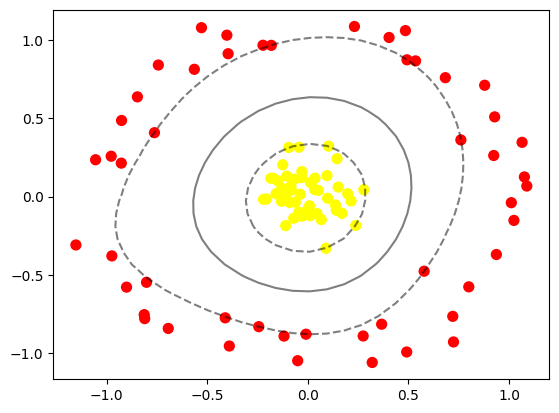

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

###Lab 3 - SVM Data Overlapping

####Langkah 1 - Import library & Buat fungsi plotting

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [24]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');

  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

####Langkah 2 - Membuat data dummy

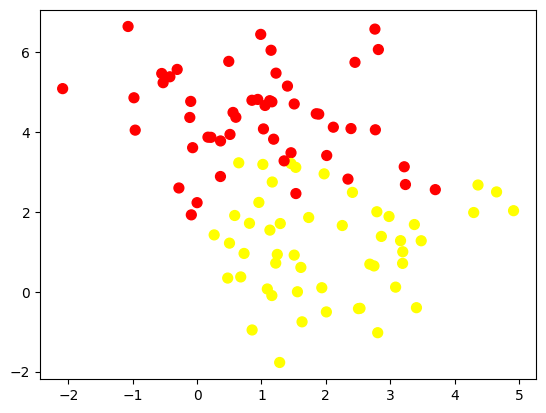

In [21]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

####Langkah 3 - Analisis dampak tunning

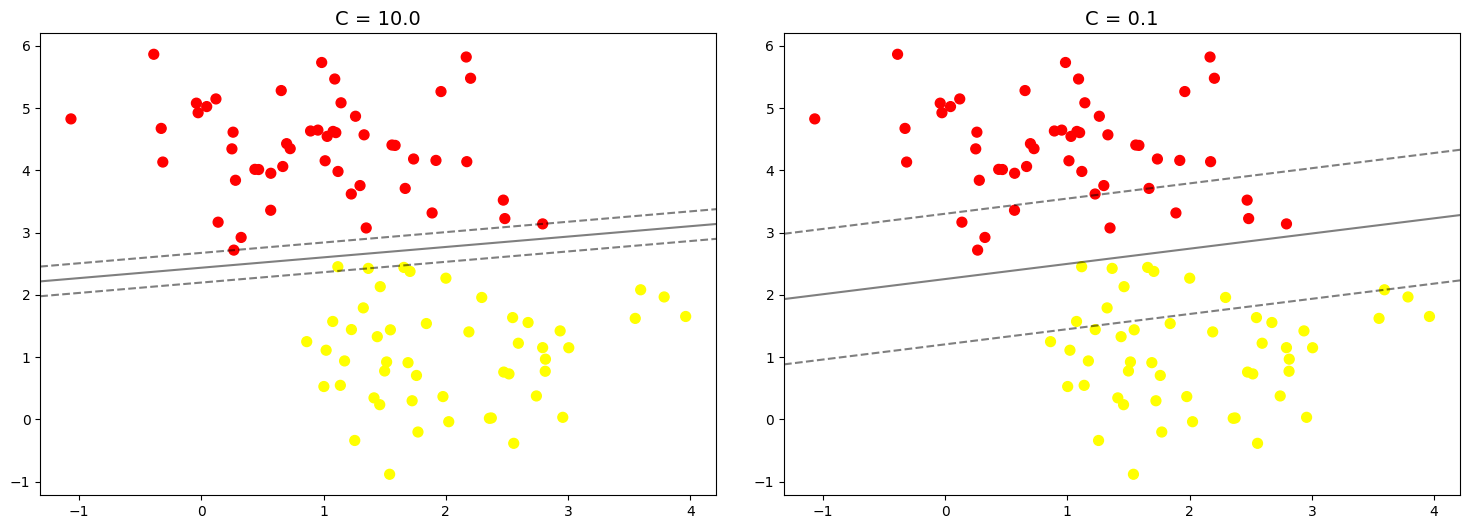

In [25]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
  model = SVC(kernel='linear', C=C).fit(X, y)
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  plot_svc_decision_function(model, axi)
  axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
  axi.set_title('C = {0:.1f}'.format(C), size=14)

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Perlu diperhatikan bahwa nilai optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa).



###Lab 4 - Klasifikasi Citra Wajah

####Langkah 0 - Unduh dataset

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


####Langkah 1 - Inspeksi citra wajah

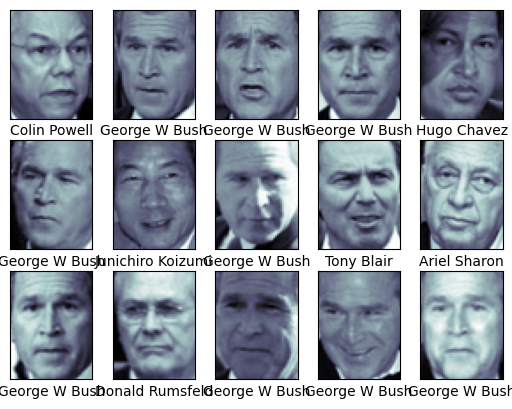

In [27]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi, in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

####Langakh 2 - Pra Pengolahan data

In [28]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

####Langkah 3 - Split data

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

####Langkah 4 - Pembuatan model + tunning

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 7s, sys: 230 ms, total: 2min 8s
Wall time: 1min 17s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [34]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

####Langkah 5 - Cek hasil prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

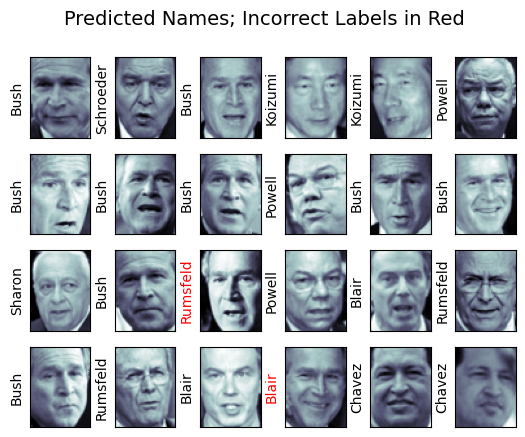

In [35]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

####Langkah 6 - Cek performansi

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Confusion Matrix

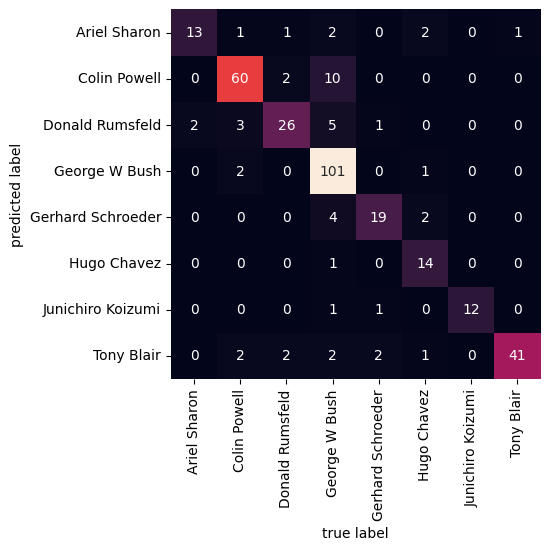

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

###Lab 5 - Klasifikasi Citra Siang dan Malam

####Langkah 0 - Import library

In [38]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [39]:
test_dir = '/content/drive/MyDrive/images/test/'
train_dir = '/content/drive/MyDrive/images/training/'

####Langkah 1 - Load Data dan visualisasikan

In [40]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [41]:
train_img = load_dataset(train_dir)

Pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [42]:
train_img[0]

(array([[[198, 205, 213],
         [171, 178, 186],
         [173, 180, 188],
         ...,
         [169, 180, 186],
         [169, 180, 186],
         [169, 180, 186]],
 
        [[198, 205, 213],
         [171, 178, 186],
         [173, 180, 188],
         ...,
         [170, 181, 187],
         [169, 180, 186],
         [169, 180, 186]],
 
        [[198, 205, 213],
         [171, 178, 186],
         [173, 180, 188],
         ...,
         [170, 181, 187],
         [170, 181, 187],
         [170, 181, 187]],
 
        ...,
 
        [[ 55,  46,  37],
         [ 36,  27,  18],
         [ 34,  25,  18],
         ...,
         [ 37,  35,  23],
         [ 42,  40,  28],
         [ 43,  43,  31]],
 
        [[ 59,  50,  41],
         [ 40,  31,  22],
         [ 36,  27,  20],
         ...,
         [ 36,  34,  22],
         [ 40,  38,  26],
         [ 40,  40,  28]],
 
        [[ 62,  53,  44],
         [ 43,  34,  25],
         [ 37,  28,  21],
         ...,
         [ 34,  32,  20],
  

cek ukuran gambar secara acak

In [43]:
pick_random = np.random.randint(0, len(train_img))

print(f'image {pick_random}')
print(train_img[pick_random][0].shape)

image 153
(593, 800, 3)


Membuat fungsi untuk visualisasi gambar

In [44]:
def random_img_viz(img_list):
  rand_num = np.random.randint(0, len(img_list))

  img = img_list[rand_num][0]
  label = img_list[rand_num][1]
  label_str = 'day' if label == 1 else 'night'
  plt.imshow(img)
  print(f'Shape\t: {img.shape}')
  print(f'Label\t: {label}')

Shape	: (737, 1024, 3)
Label	: night


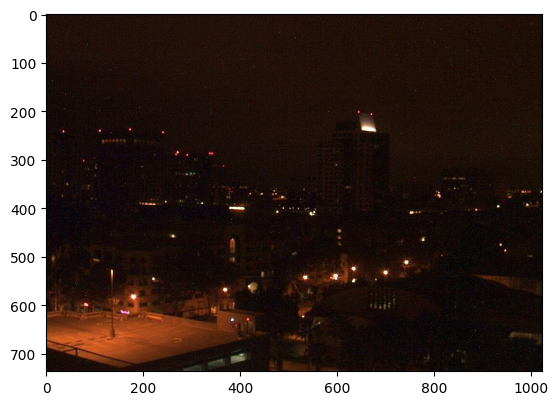

In [45]:
random_img_viz(train_img)

####Langkah 3 - Pra Pengolahan Data

Funsgi untuk menstandarkan ukuran gambar

In [46]:
def standarized_input(image):
  std_img = cv2.resize(image, (1100, 600))

  return std_img

Fungsi untuk encoding label
 - Day = 1
 - Night = 0

In [47]:
def label_encoder(label):
  num_val = 0

  if (label == 'day'):
    num_val = 1

  return num_val

Fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [49]:
def preprocess(img_list):
  std_img_list = []

  for item in img_list:
    image = item[0]
    label = item[1]

    std_img = standarized_input(image)

    img_label = label_encoder(label)

    std_img_list.append((std_img, img_label))

  return std_img_list

Pra pengolahan pada data training

In [68]:
train_std_img_list = preprocess(train_img)

Pengecekkan gambar secara acak

In [51]:
pick_random = np.random.randint(0, len(train_std_img_list))

print(f'image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

image 177
(600, 1100, 3)


Visualisasi

Shape	: (600, 1100, 3)
Label	: 1


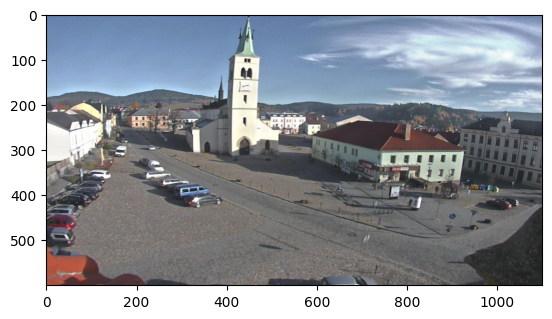

In [52]:
random_img_viz(train_std_img_list)

####Langkah 4 - Ekstraksi fitur

In [54]:
def avg_brightness(image):
  img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

  sum_brightness = np.sum(img_hsv[:, :, 2])
  area = image.shape[0] * image.shape[1]
  avg = sum_brightness / area

  return avg

Pengecekkan gambar secara acak pada gambar yang telah melalui preprocessing

Image 112
Average brightness: 107.6507


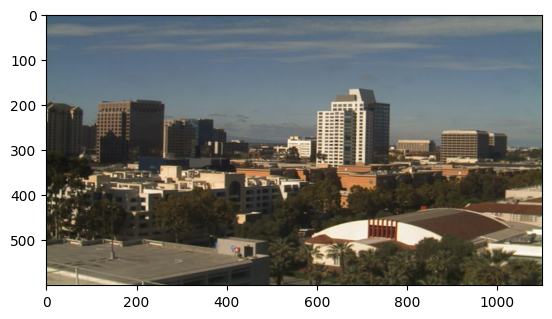

In [55]:
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Average brightness: {avg_img:.4f}')
plt.imshow(feature_img)

####Langkah 5 - Klasifikasi dengan metode threshold

In [56]:
def predict_label(img, threshold):
  avg_img = avg_brightness(img)
  pred = 0

  if (avg_img > threshold):
    pred = 1

  return pred

Pengecekkan secara acak

Image 33
Actual label: 1
Predicted label: 1


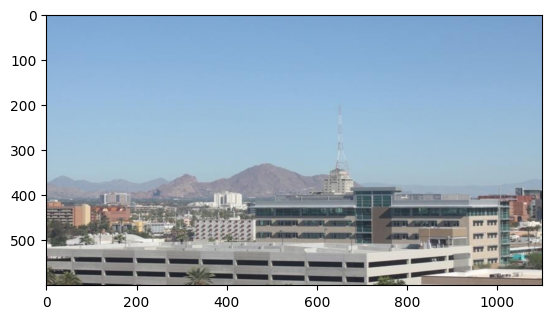

In [57]:
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

####Langkah 6 - Evaluasi Manual

In [58]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:

        img = file[0]
        label = file[1]


        pred_label = predict_label(img, threshold)

        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [60]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [61]:
test_img = load_dataset(test_dir)

test_std_img_list = preprocess(test_img)

evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


####Klasifikasi dengan SVM

Membuat Feature vectors

In [62]:
def extract_avg_bright_feature(img_list):
  avg_list = []
  labels = []

  for img in img_list:
    img_avg = avg_brightness(img[0])
    img_label = img[1]

    avg_list.append(img_avg)
    labels.append(img_label)

  data = np.column_stack((avg_list, labels))

  df = pd.DataFrame(data, columns=['avg_brightness', 'label'])

  return df


hasil pada data training

In [63]:
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,avg_brightness,label
0,110.086635,1.0
1,143.662879,1.0
2,123.617420,1.0
3,148.774148,1.0
4,112.948195,1.0


hasil pada data testing

In [64]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,avg_brightness,label
0,157.650256,1.0
1,191.237441,1.0
2,158.883767,1.0
3,194.228062,1.0
4,150.341579,1.0


Membuat model SVM

In [65]:
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Evaluasi

In [66]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
